In [ ]:
%matplotlib inline


# Classification

The following example shows how to fit a simple classification model with
*auto-sklearn*.


In [4]:
# !pip install auto-sklearn

# $ brew install swig
# $ brew link swig
# $ pip install auto-sklearn


In [2]:
from pprint import pprint

import sklearn.datasets
import sklearn.metrics

import autosklearn.classification

## Data Loading



In [3]:
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=1
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

## Build and fit a classifier



In [4]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder="/tmp/autosklearn_classification_example_tmp",
)
automl.fit(X_train, y_train, dataset_name="breast_cancer")

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=30, time_left_for_this_task=120,
                      tmp_folder='/tmp/autosklearn_classification_example_tmp')

## View the models found by auto-sklearn



In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight                type      cost  duration
model_id                                                               
7            1             0.12         extra_trees  0.014184  1.869988
16           2             0.06   gradient_boosting  0.021277  1.358258
21           3             0.04         extra_trees  0.021277  1.732414
31           4             0.14         extra_trees  0.021277  2.220872
2            8             0.02       random_forest  0.028369  2.064990
3           11             0.06                 mlp  0.028369  1.373552
6           10             0.04                 mlp  0.028369  1.407947
9            9             0.04         extra_trees  0.028369  2.222528
11          12             0.02       random_forest  0.028369  2.639387
19           7             0.04         extra_trees  0.028369  3.397437
22           6             0.08   gradient_boosting  0.028369  1.352810
26           5             0.02         extra_trees  0.028369  2

## Print the final ensemble constructed by auto-sklearn



In [ ]:
pprint(automl.show_models(), indent=4)

{   2: {   'balancing': Balancing(random_state=1),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fd8d29ac950>,
           'cost': 0.028368794326241176,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fd8ce29a690>,
           'ensemble_weight': 0.02,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fd8d29acf10>,
           'model_id': 2,
           'rank': 1,
           'sklearn_classifier': RandomForestClassifier(max_features=5, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)},
    3: {   'balancing': Balancing(random_state=1),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fd8ce23a390>,
           'cost': 0.028368794326241176,
           'data_preprocessor': <autosklearn.pipeline.component

## Get the Score of the final ensemble



In [ ]:
predictions = automl.predict(X_test)
print("Accuracy score:", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score: 0.9440559440559441


In [ ]:
print("Accuracy score:", sklearn.metrics.classification_report(y_test, predictions))

Accuracy score:               precision    recall  f1-score   support

           0       0.94      0.91      0.93        55
           1       0.94      0.97      0.96        88

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [ ]:
%matplotlib inline


# Multi-label Classification

This examples shows how to format the targets for a multilabel classification
problem. Details on multilabel classification can be found
[here](https://scikit-learn.org/stable/modules/multiclass.html).


In [ ]:
import numpy as np
from pprint import pprint

import sklearn.datasets
import sklearn.metrics
from sklearn.utils.multiclass import type_of_target

import autosklearn.classification

## Data Loading



In [ ]:
# Using reuters multilabel dataset -- https://www.openml.org/d/40594
X, y = sklearn.datasets.fetch_openml(data_id=40594, return_X_y=True, as_frame=False)

# fetch openml downloads a numpy array with TRUE/FALSE strings. Re-map it to
# integer dtype with ones and zeros
# This is to comply with Scikit-learn requirement:
# "Positive classes are indicated with 1 and negative classes with 0 or -1."
# More information on: https://scikit-learn.org/stable/modules/multiclass.html
y[y == "TRUE"] = 1
y[y == "FALSE"] = 0
y = y.astype(int)

# Using type of target is a good way to make sure your data
# is properly formatted
print(f"type_of_target={type_of_target(y)}")

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=1
)

type_of_target=multilabel-indicator


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1500, 243), (500, 243), (1500, 7), (500, 7))

## Building the classifier



In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=60,
    per_run_time_limit=30,
    # Bellow two flags are provided to speed up calculations
    # Not recommended for a real implementation
    initial_configurations_via_metalearning=0,
    smac_scenario_args={"runcount_limit": 1},
)
automl.fit(X_train, y_train, dataset_name="reuters")

[WARNING] [2022-10-30 22:52:32,394:Client-AutoML(1):reuters] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.


AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      initial_configurations_via_metalearning=0,
                      per_run_time_limit=30,
                      smac_scenario_args={'runcount_limit': 1},
                      time_left_for_this_task=60)

## View the models found by auto-sklearn



In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight           type      cost  duration
model_id                                                          
2            1              1.0  random_forest  0.447294  4.152411


## Print the final ensemble constructed by auto-sklearn



In [ ]:
pprint(automl.show_models(), indent=4)

{   2: {   'balancing': Balancing(random_state=1),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fd8ce9d3450>,
           'cost': 0.4472941828699525,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fd8ce4b6d50>,
           'ensemble_weight': 1.0,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fd8ce9f6110>,
           'model_id': 2,
           'rank': 1,
           'sklearn_classifier': RandomForestClassifier(max_features=15, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)}}


## Print statistics about the auto-sklearn run



In [ ]:
# Print statistics about the auto-sklearn run such as number of
# iterations, number of models failed with a time out.
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: reuters
  Metric: f1_macro
  Best validation score: 0.552706
  Number of target algorithm runs: 1
  Number of successful target algorithm runs: 1
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



## Get the Score of the final ensemble



In [ ]:
predictions = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 0.604


In [ ]:
print("Accuracy score", sklearn.metrics.classification_report(y_test, predictions))

Accuracy score               precision    recall  f1-score   support

           0       1.00      0.82      0.90       202
           1       0.94      0.75      0.84       129
           2       0.86      0.43      0.58        74
           3       1.00      0.03      0.06        33
           4       0.83      0.14      0.24        35
           5       1.00      0.09      0.17        33
           6       0.92      0.49      0.64        69

   micro avg       0.96      0.59      0.73       575
   macro avg       0.94      0.39      0.49       575
weighted avg       0.95      0.59      0.68       575
 samples avg       0.62      0.62      0.62       575



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%matplotlib inline


# Regression

The following example shows how to fit a simple regression model with
*auto-sklearn*.


In [ ]:
from pprint import pprint

import sklearn.datasets
import sklearn.metrics

import autosklearn.regression
import matplotlib.pyplot as plt

## Data Loading



In [ ]:
X, y = sklearn.datasets.load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=1
)

## Build and fit a regressor



In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder="/tmp/autosklearn_regression_example_tmp",
)
automl.fit(X_train, y_train, dataset_name="diabetes")

AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=30, time_left_for_this_task=120,
                     tmp_folder='/tmp/autosklearn_regression_example_tmp')

## View the models found by auto-sklearn



In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
5            1             0.16   gaussian_process  0.455015  15.680680
6            2             0.40     ard_regression  0.455042   0.858177
30           3             0.32     ard_regression  0.461670   0.962348
7            4             0.02  gradient_boosting  0.518673   1.439380
32           5             0.10      liblinear_svr  0.603061   0.960832


## Print the final ensemble constructed by auto-sklearn



In [ ]:
pprint(automl.show_models(), indent=4)

{   5: {   'cost': 0.4550152734815238,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fd8d2c5b750>,
           'ensemble_weight': 0.16,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fd8ce439a50>,
           'model_id': 5,
           'rank': 1,
           'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7fd8ce439250>,
           'sklearn_regressor': GaussianProcessRegressor(alpha=0.283161627129086,
                         kernel=RBF(length_scale=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## Get the Score of the final ensemble
After training the estimator, we can now quantify the goodness of fit. One possibility for
is the [R2 score](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score).
The values range between -inf and 1 with 1 being the best possible value. A dummy estimator
predicting the data mean has an R2 score of 0.



In [ ]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.5848887526360251
Test R2 score: 0.3899369860134758


## Plot the predictions
Furthermore, we can now visually inspect the predictions. We plot the true value against the
predictions and show results on train and test data. Points on the diagonal depict perfect
predictions. Points below the diagonal were overestimated by the model (predicted value is higher
than the true value), points above the diagonal were underestimated (predicted value is lower than
the true value).



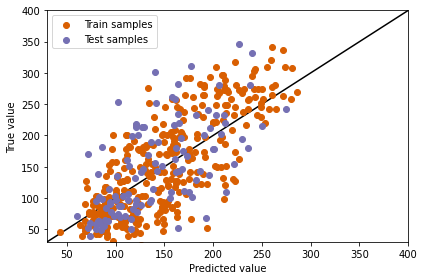

In [ ]:
plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([30, 400], [30, 400], c="k", zorder=0)
plt.xlim([30, 400])
plt.ylim([30, 400])
plt.tight_layout()
plt.show()

In [ ]:
%matplotlib inline


# Multi-output Regression

The following example shows how to fit a multioutput regression model with
*auto-sklearn*.


In [ ]:
import numpy as numpy
from pprint import pprint

from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from autosklearn.regression import AutoSklearnRegressor

## Data Loading



In [ ]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Build and fit a regressor



In [ ]:
automl = AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder="/tmp/autosklearn_multioutput_regression_example_tmp",
)
automl.fit(X_train, y_train, dataset_name="synthetic")

[WARNING] [2022-10-30 23:01:36,754:Client-AutoMLSMBO(1)::synthetic] Could not find meta-data directory /usr/local/lib/python3.7/dist-packages/autosklearn/metalearning/files/r2_multioutput.regression_dense


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=30, time_left_for_this_task=120,
                     tmp_folder='/tmp/autosklearn_multioutput_regression_example_tmp')

## View the models found by auto-sklearn



In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight              type          cost  duration
model_id                                                                 
4            1              1.0  gaussian_process  1.072847e-07  3.584767


## Print the final ensemble constructed by auto-sklearn



In [ ]:
pprint(automl.show_models(), indent=4)

{   4: {   'cost': 1.0728467747522785e-07,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fd8cb4a1750>,
           'ensemble_weight': 1.0,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fd8cb214090>,
           'model_id': 4,
           'rank': 1,
           'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7fd8cb218ed0>,
           'sklearn_regressor': GaussianProcessRegressor(alpha=2.6231667524556984e-13,
                         kernel=RBF(length_scale=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
                         n_restarts_optimizer=10, normalize_y=True,
                         random_state=1)}}


## Get the Score of the final ensemble



In [ ]:
predictions = automl.predict(X_test)
print("R2 score:", r2_score(y_test, predictions))

R2 score: 0.9999998878613612


## Get the configuration space



In [ ]:
# The configuration space is reduced, i.e. no SVM.
print(automl.get_configuration_space(X_train, y_train))

Configuration space object:
  Hyperparameters:
    data_preprocessor:__choice__, Type: Categorical, Choices: {feature_type}, Default: feature_type
    data_preprocessor:feature_type:numerical_transformer:imputation:strategy, Type: Categorical, Choices: {mean, median, most_frequent}, Default: mean
    data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__, Type: Categorical, Choices: {minmax, none, normalize, power_transformer, quantile_transformer, robust_scaler, standardize}, Default: standardize
    data_preprocessor:feature_type:numerical_transformer:rescaling:quantile_transformer:n_quantiles, Type: UniformInteger, Range: [10, 2000], Default: 1000
    data_preprocessor:feature_type:numerical_transformer:rescaling:quantile_transformer:output_distribution, Type: Categorical, Choices: {normal, uniform}, Default: normal
    data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max, Type: UniformFloat, Range: [0.7, 0.999], Default: 0.75
    dat